<a href="https://colab.research.google.com/github/rahulsait/ExcelR-codes/blob/main/NORMAL_DISTRIBUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from scipy import stats


**Q] Finf the probability that a Normally distributed random variable has a mean of 60 and a standard deviation of 10 and we want to find the probability that X is less than 70.**

In [ ]:
# this formula is always for (P<=x)
stats.norm.cdf(70, loc = 60, scale = 10)

0.8413447460685429

**Q] Suppose Gmat scores can be reasonably modeled using a normal distribution - μ = 711 and σ = 29.
(a) What is P(X<=680) ?**

In [ ]:
stats.norm.cdf(680, loc =711, scale = 29)

0.14254260383881612

**(b) P(X>=720)**

In [ ]:
stats.norm.cdf(720, loc = 711, scale = 29)
# this is for X<=720 , so we have to subtract it from 1 to get our desired answer


0.621850627348053

In [ ]:
1 - 0.621

0.379

**(c) P(680<X<740)**

In [ ]:
# so the answer is the area when P<680 is subtracted from P<740 :
stats.norm.cdf(740, loc = 711, scale = 29)

0.8413447460685429

In [ ]:
stats.norm.cdf(680, loc = 711, scale = 29)

0.14254260383881612

In [ ]:
# P(680<X<740) is :
0.8413 - 0.1425

0.6988000000000001

In [ ]:
stats.norm.cdf(-0.02, 0.0004, 0.0134)

0.06395593743937553

****

In [ ]:
1 - stats.norm.cdf(0.02, 0.0004, 0.0134)

0.07177658173190637

In [7]:
import pandas as pd
import numpy as np
from scipy import stats

In [8]:
beml_df = pd.read_csv("/content/BEML.csv")

In [9]:
beml_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [10]:
glaxo_df = pd.read_csv("/content/GLAXO.csv")

In [11]:
glaxo_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


to calculate the Gain, we need only "Date" column and "Close" column

In [14]:
beml_df = beml_df[["Date","Close"]]
glaxo_df = glaxo_df[["Date","Close"]]

In [15]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [16]:
glaxo_df

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


now, we convert the "Date" column into an Index for both the data sets :

In [17]:
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df["Date"]))
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df["Date"]))

now we plot both the data sets :

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Close Price')

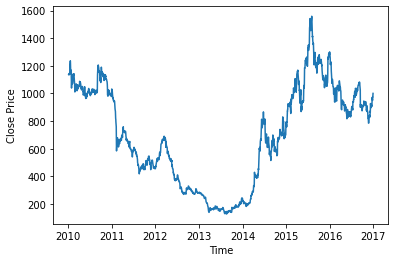

In [21]:
plt.plot(beml_df.Close)
plt.xlabel("Time")
plt.ylabel("Close Price")

Text(0, 0.5, 'Close Price')

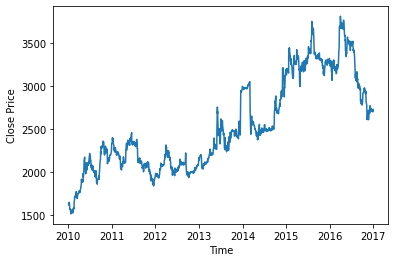

In [22]:
plt.plot(glaxo_df.Close)
plt.xlabel("Time")
plt.ylabel("Close Price")

now we compute the gain for both the data sets :

In [23]:
beml_df["gain"] = beml_df.Close.pct_change(periods = 1)
glaxo_df["gain"] = glaxo_df.Close.pct_change(periods = 1)

In [24]:
beml_df

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1135.60,NaN
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


In [25]:
glaxo_df

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


as the gain in first row for both the data sets is NaN, we drop the first row

In [26]:
beml_df = beml_df.dropna()
glaxo_df = glaxo_df.dropna()

now we plot the gains :

Text(0, 0.5, 'gain')

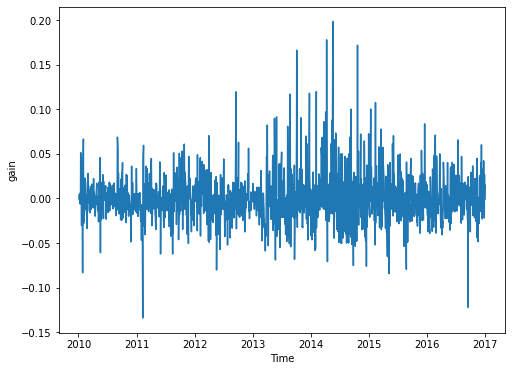

In [27]:
plt.figure(figsize = (8,6))
plt.plot(beml_df.index, beml_df.gain)
plt.xlabel("Time")
plt.ylabel("gain")

Text(0, 0.5, 'gain')

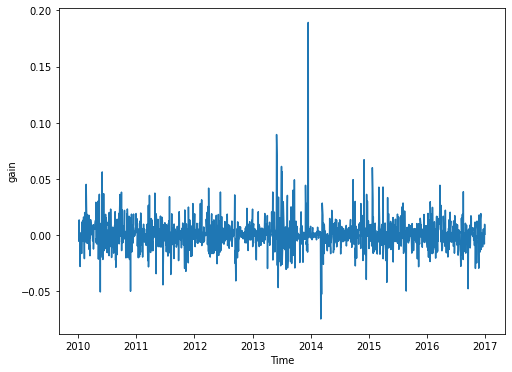

In [28]:
plt.figure(figsize = (8,6))
plt.plot(glaxo_df.index, glaxo_df.gain)
plt.xlabel("Time")
plt.ylabel("gain")

now we plot histograms of gain for both the data sets :

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


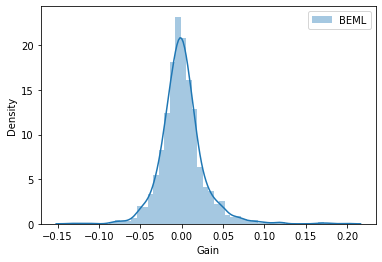

In [33]:
sns.distplot(beml_df.gain, label = "BEML")
plt.xlabel("Gain")
plt.ylabel("Density")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


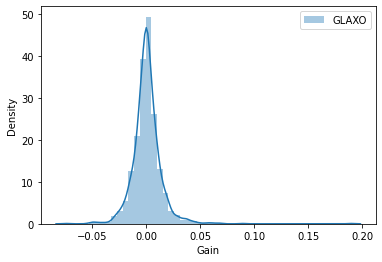

In [34]:
sns.distplot(glaxo_df.gain, label = "GLAXO")
plt.xlabel("Gain")
plt.ylabel("Density")
plt.legend()

now we compute the mean and std for both the data sets :

In [35]:
print("Mean : ", round(beml_df.gain.mean(), 4))
print("STD : ", round(beml_df.gain.std(), 4))

Mean :  0.0003
STD :  0.0264


In [36]:
print("Mean : ", round(glaxo_df.gain.mean(), 4))
print("STD : ", round(glaxo_df.gain.std(), 4))

Mean :  0.0004
STD :  0.0134


now we compute the probabilities for the questions asked : 

In [37]:
from scipy import stats

In [38]:
# Probability of making 2% loss or higher in BEML :
stats.norm.cdf(-0.02, beml_df.gain.mean(), beml_df.gain.std())

0.22155987503755292

In [39]:
# Probability of making 2% loss or higher in GLAXO :
stats.norm.cdf(-0.02, glaxo_df.gain.mean(), glaxo_df.gain.std())

0.06352488667177401

In [40]:
# Probability of making 2% gain or higher in BEML :
1 - stats.norm.cdf(0.02, beml_df.gain.mean(), beml_df.gain.std())

0.22769829484075355

In [41]:
# Probability of making 2% gain or higher in GLAXO :
1 - stats.norm.cdf(0.02, glaxo_df.gain.mean(), glaxo_df.gain.std())

0.07104511457618568